### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [6]:
data = pd.read_csv('data/coupons.csv')

In [7]:
data.head(2)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0


In [8]:
data.columns

Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'car', 'Bar', 'CoffeeHouse',
       'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50',
       'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min',
       'direction_same', 'direction_opp', 'Y'],
      dtype='object')

In [9]:
print(data['destination'].value_counts())
print('\n',data['passanger'].value_counts())
print('\n',data['weather'].value_counts())
print('\n',data['temperature'].value_counts())
print('\n',data['time'].value_counts())

print('\n',data['coupon'].value_counts())
print('\n',data['expiration'].value_counts())
print('\n',data['gender'].value_counts())
print('\n',data['age'].value_counts())
print('\n',data['maritalStatus'].value_counts())
print('\n',data['has_children'].value_counts())
print('\n',data['education'].value_counts())
print('\n',data['occupation'].value_counts())
print('\n',data['income'].value_counts())
print('\n',data['car'].value_counts())
print('\n',data['Bar'].value_counts())
print('\n',data['CoffeeHouse'].value_counts())
print('\n',data['CarryAway'].value_counts())

print('\n',data['RestaurantLessThan20'].value_counts())
print('\n',data['Restaurant20To50'].value_counts())
print('\n',data['toCoupon_GEQ5min'].value_counts())
print('\n',data['toCoupon_GEQ15min'].value_counts())
print('\n',data['toCoupon_GEQ25min'].value_counts())

print('\n',data['direction_same'].value_counts())
print('\n',data['direction_opp'].value_counts())
print('\n',data['Y'].value_counts())

destination
No Urgent Place    6283
Home               3237
Work               3164
Name: count, dtype: int64

 passanger
Alone        7305
Friend(s)    3298
Partner      1075
Kid(s)       1006
Name: count, dtype: int64

 weather
Sunny    10069
Snowy     1405
Rainy     1210
Name: count, dtype: int64

 temperature
80    6528
55    3840
30    2316
Name: count, dtype: int64

 time
6PM     3230
7AM     3164
10AM    2275
2PM     2009
10PM    2006
Name: count, dtype: int64

 coupon
Coffee House             3996
Restaurant(<20)          2786
Carry out & Take away    2393
Bar                      2017
Restaurant(20-50)        1492
Name: count, dtype: int64

 expiration
1d    7091
2h    5593
Name: count, dtype: int64

 gender
Female    6511
Male      6173
Name: count, dtype: int64

 age
21         2653
26         2559
31         2039
50plus     1788
36         1319
41         1093
46          686
below21     547
Name: count, dtype: int64

 maritalStatus
Married partner      5100
Single         

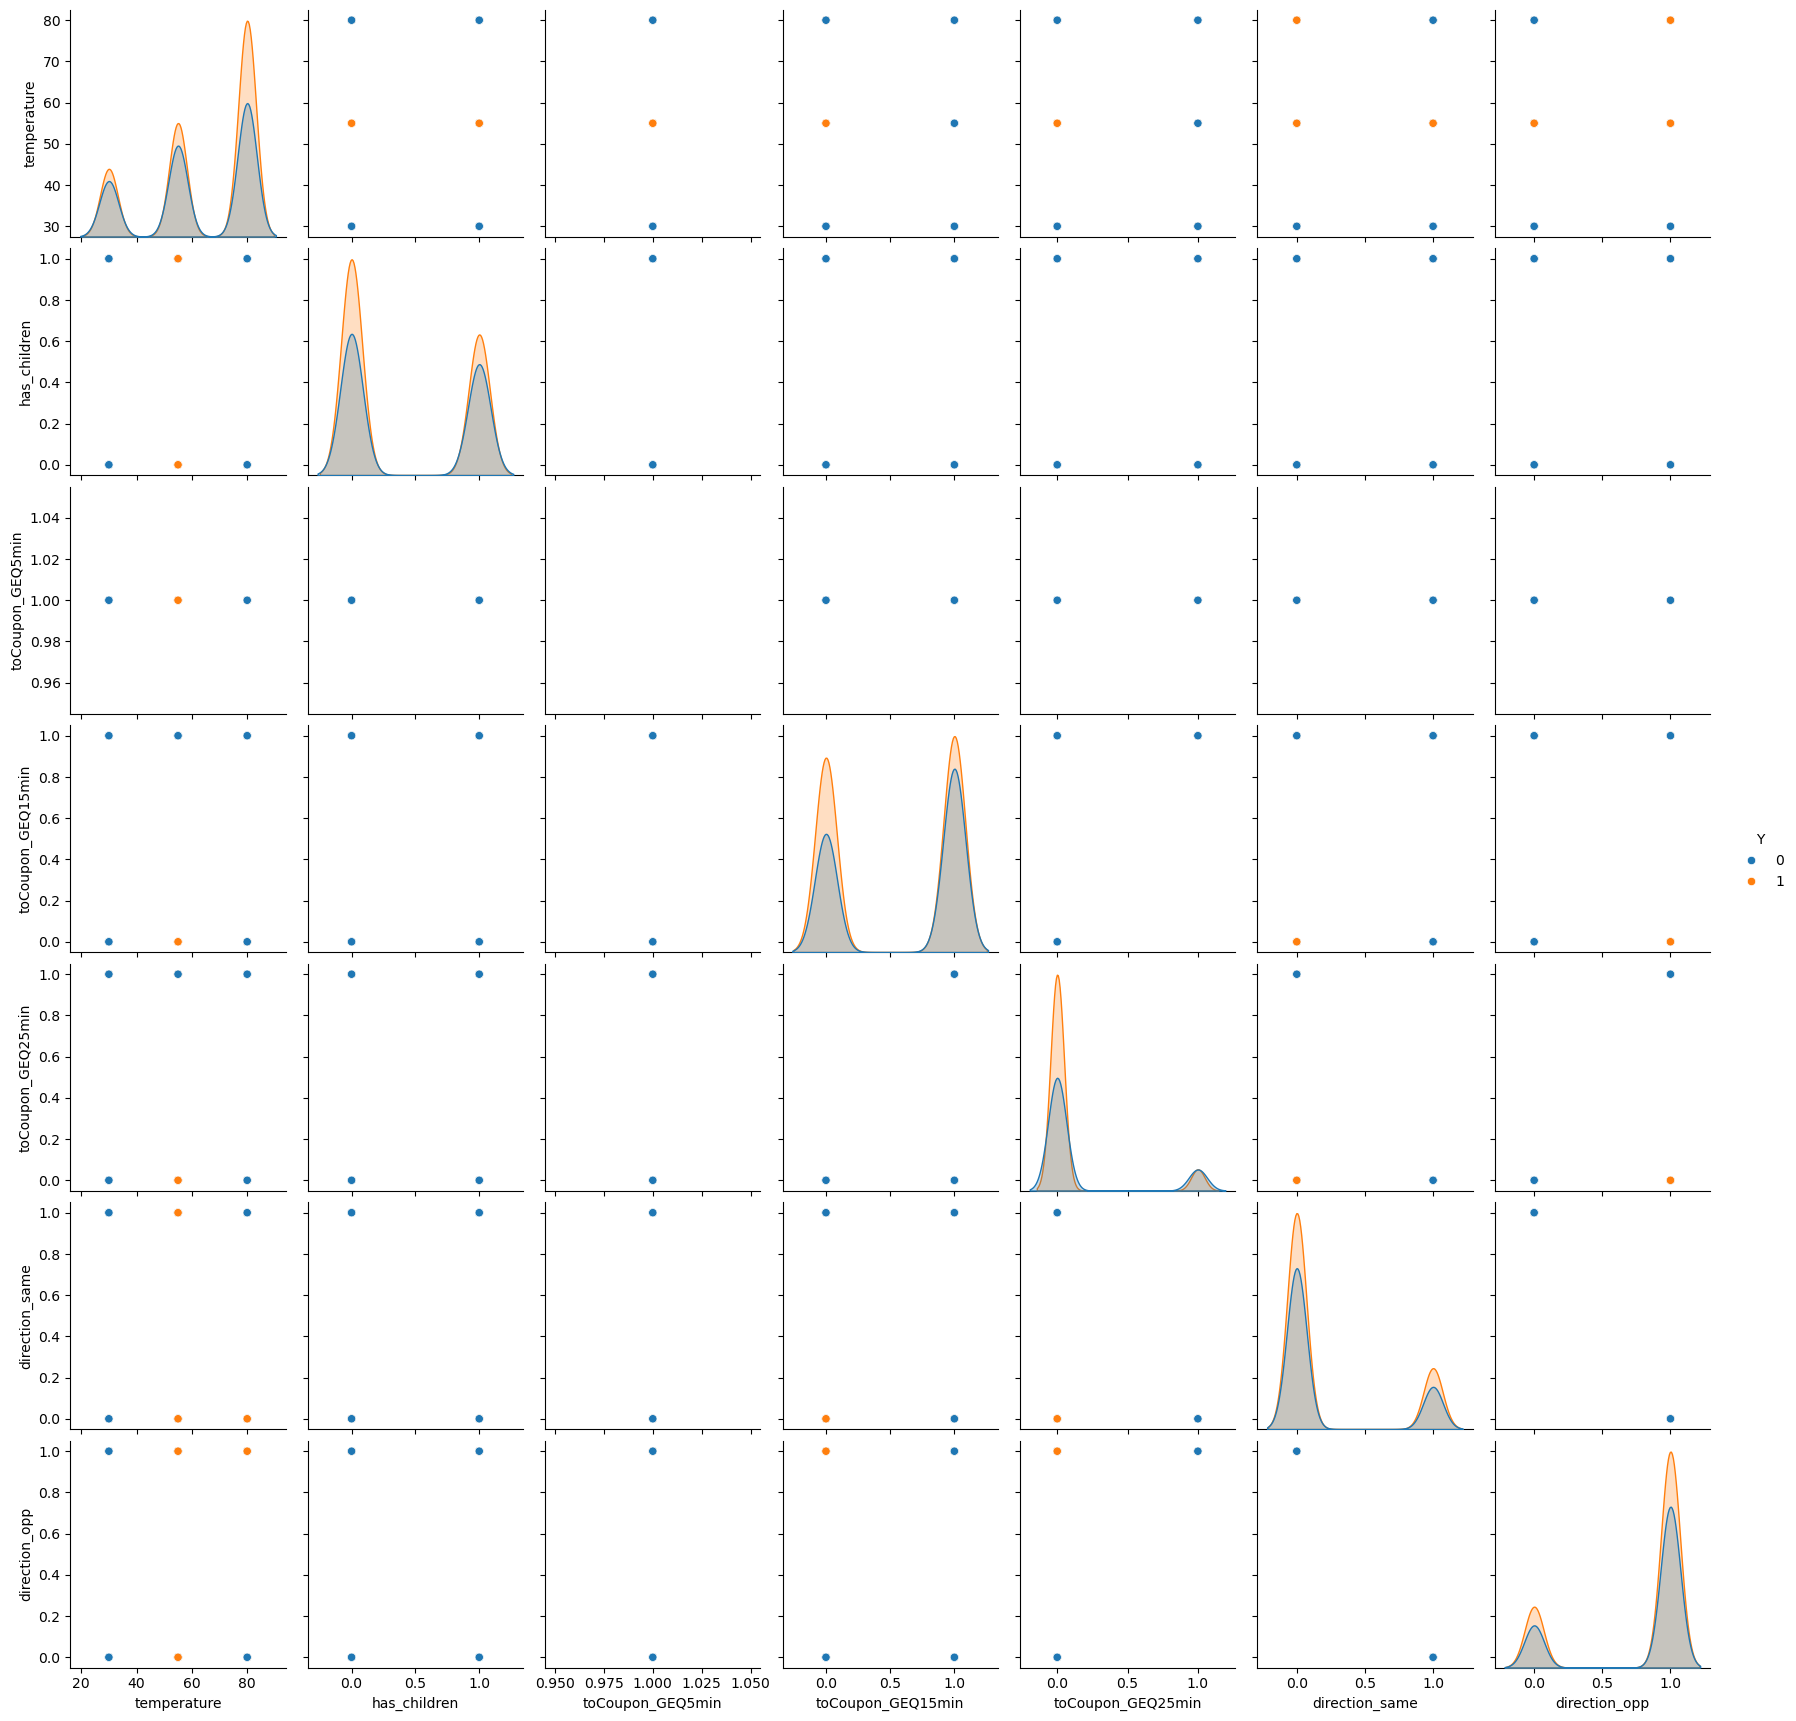

In [10]:
sns.pairplot(data, hue='Y')
plt.show()

In [11]:
data.dtypes

destination             object
passanger               object
weather                 object
temperature              int64
time                    object
coupon                  object
expiration              object
gender                  object
age                     object
maritalStatus           object
has_children             int64
education               object
occupation              object
income                  object
car                     object
Bar                     object
CoffeeHouse             object
CarryAway               object
RestaurantLessThan20    object
Restaurant20To50        object
toCoupon_GEQ5min         int64
toCoupon_GEQ15min        int64
toCoupon_GEQ25min        int64
direction_same           int64
direction_opp            int64
Y                        int64
dtype: object

In [12]:
data.select_dtypes(include=['object']).columns

Index(['destination', 'passanger', 'weather', 'time', 'coupon', 'expiration',
       'gender', 'age', 'maritalStatus', 'education', 'occupation', 'income',
       'car', 'Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20',
       'Restaurant20To50'],
      dtype='object')

In [13]:
data.select_dtypes(include=['int64']).columns

Index(['temperature', 'has_children', 'toCoupon_GEQ5min', 'toCoupon_GEQ15min',
       'toCoupon_GEQ25min', 'direction_same', 'direction_opp', 'Y'],
      dtype='object')

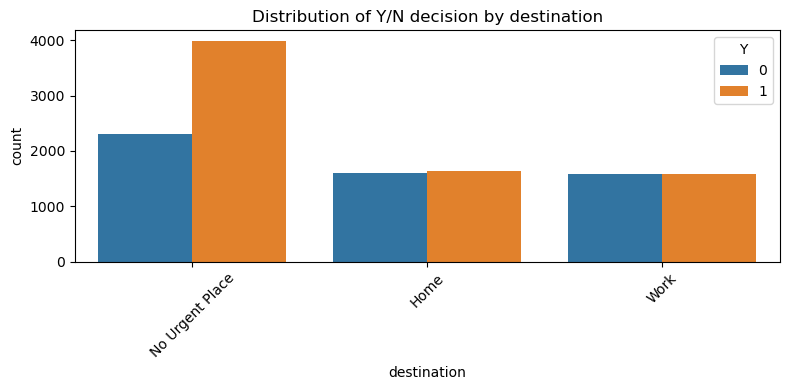

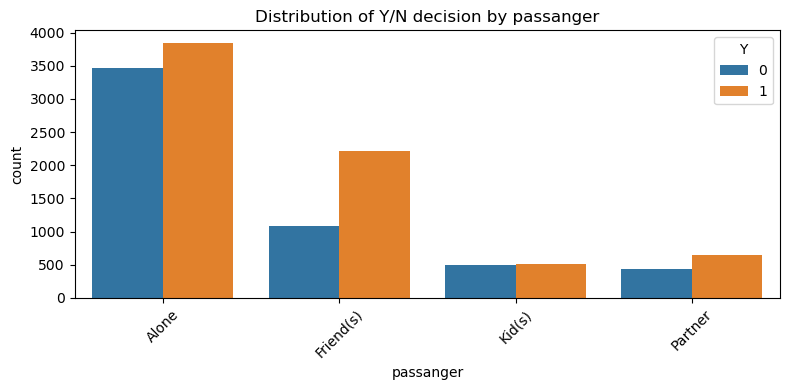

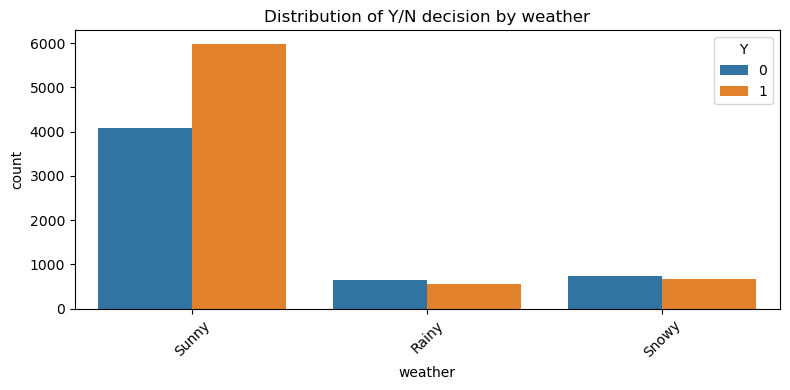

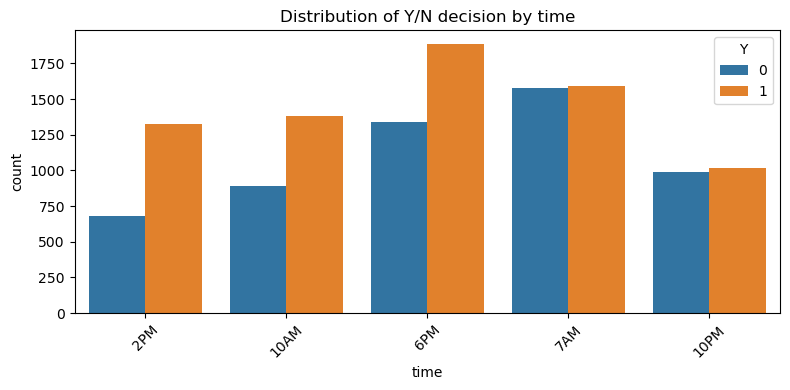

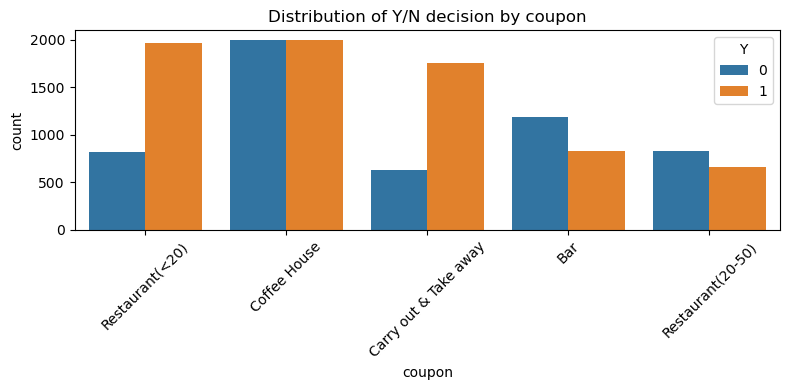

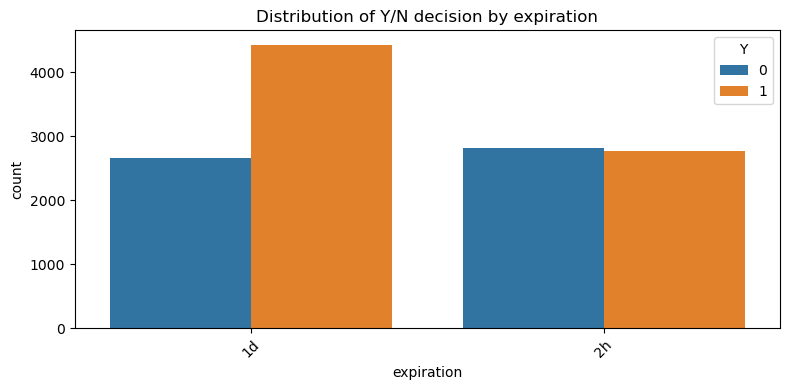

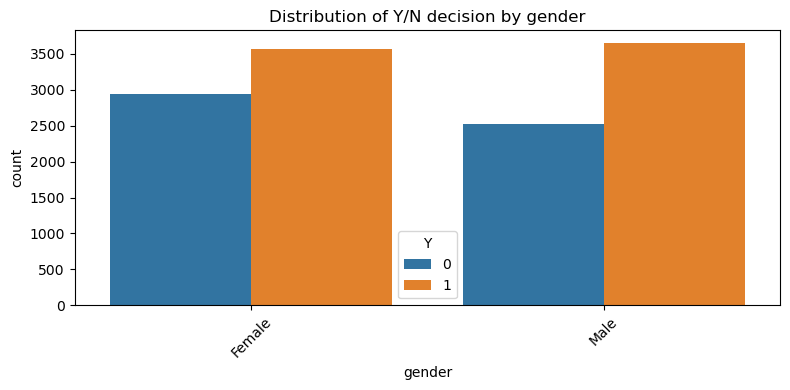

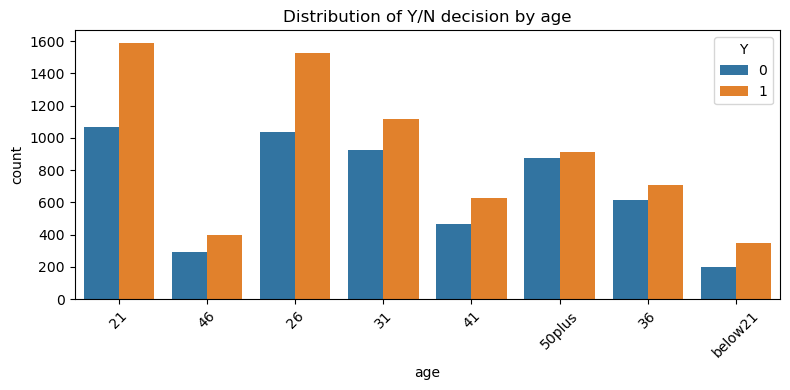

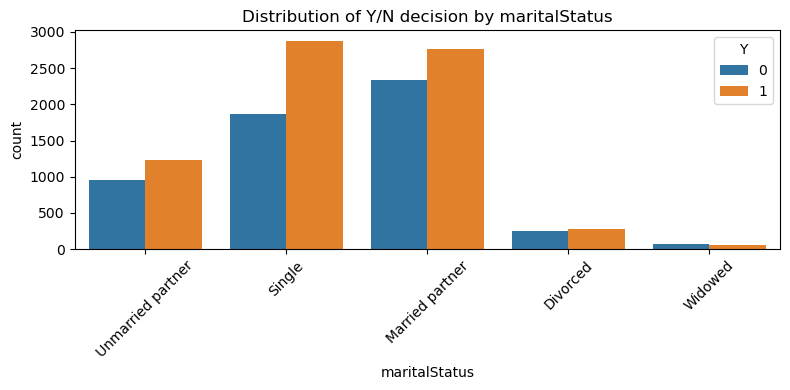

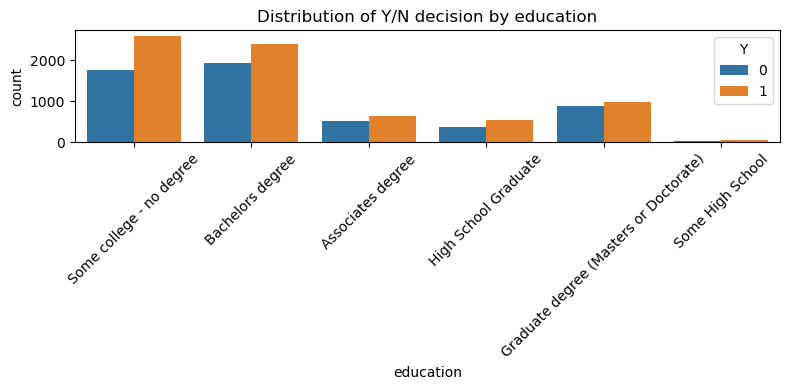

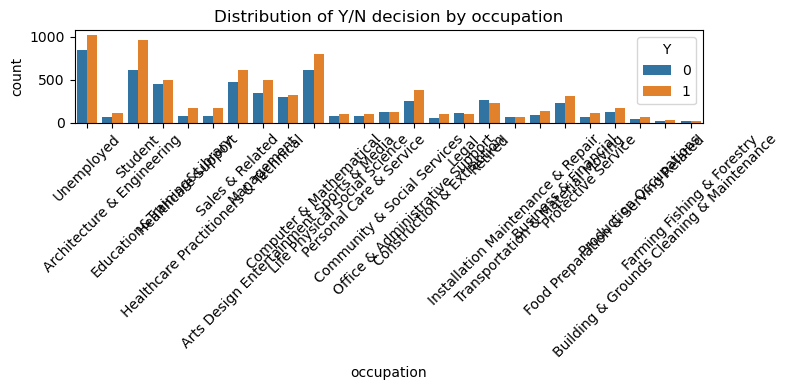

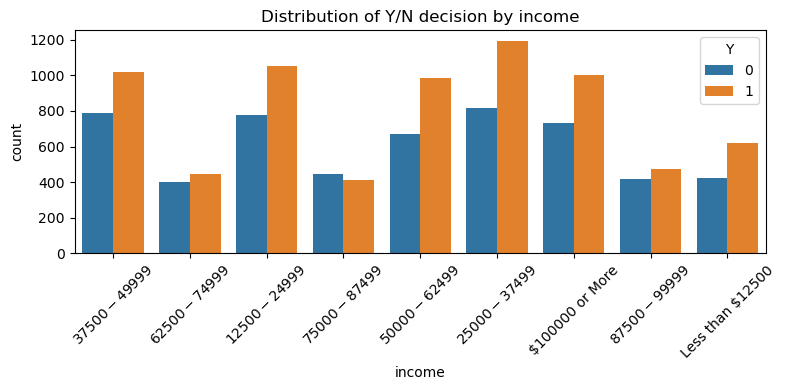

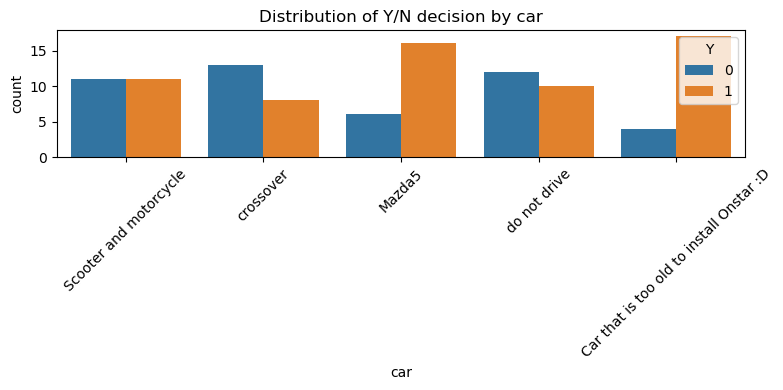

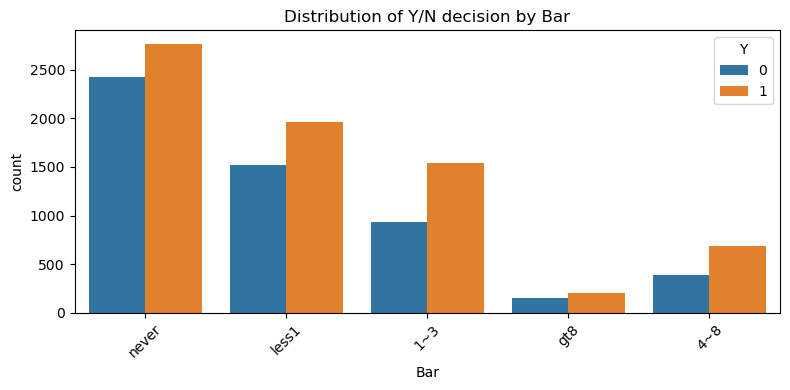

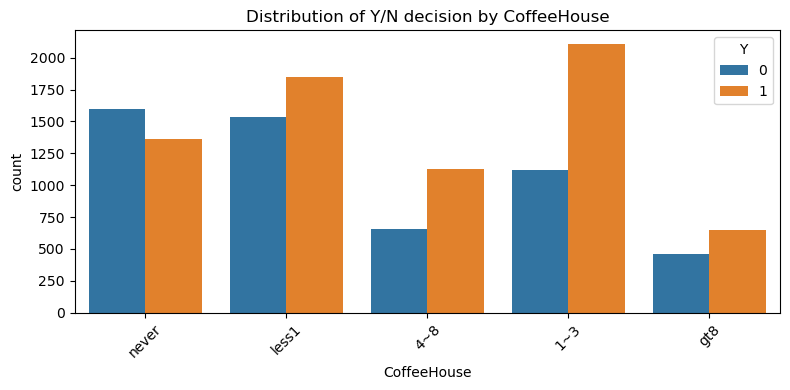

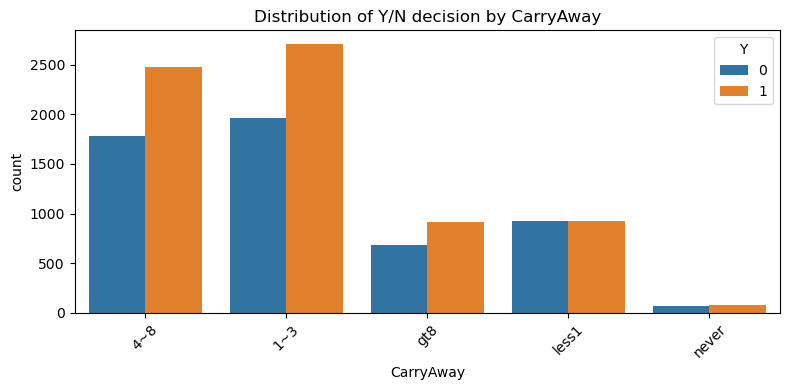

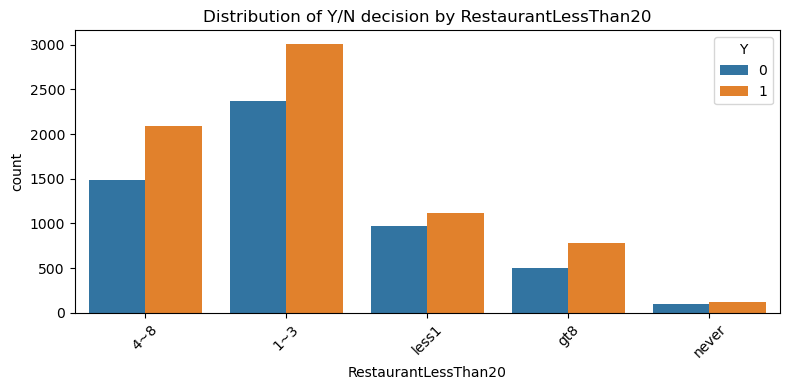

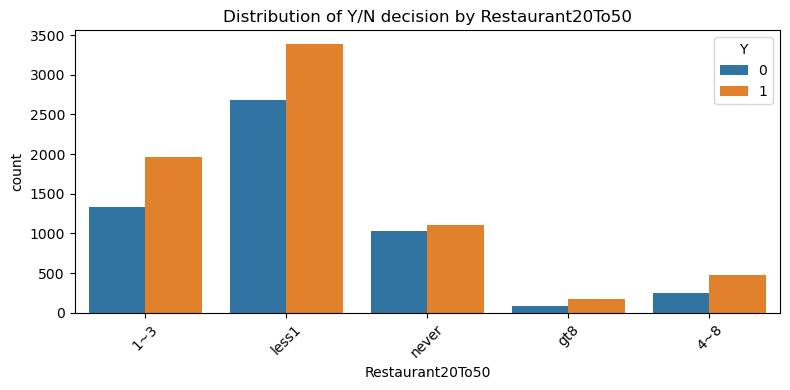

In [14]:
#I'm borrowing this logic from the course material.

categorical_columns = data.select_dtypes(include=['object']).columns

for col in categorical_columns:
    if col != 'Y':
        plt.figure(figsize=(8, 4))
        sns.countplot(x=col, hue='Y', data=data)
        plt.title(f'Distribution of Y/N decision by {col}')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

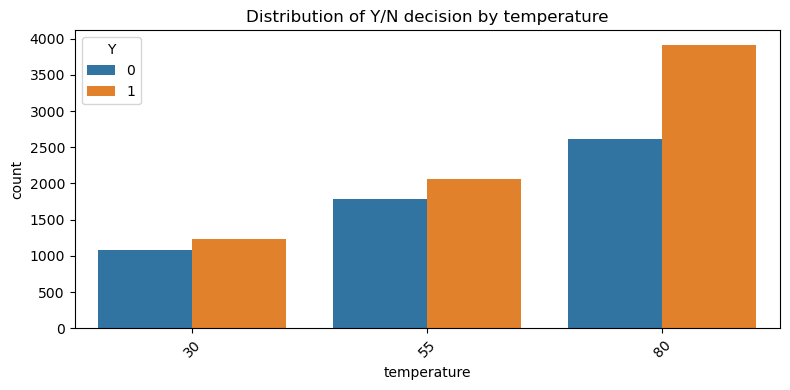

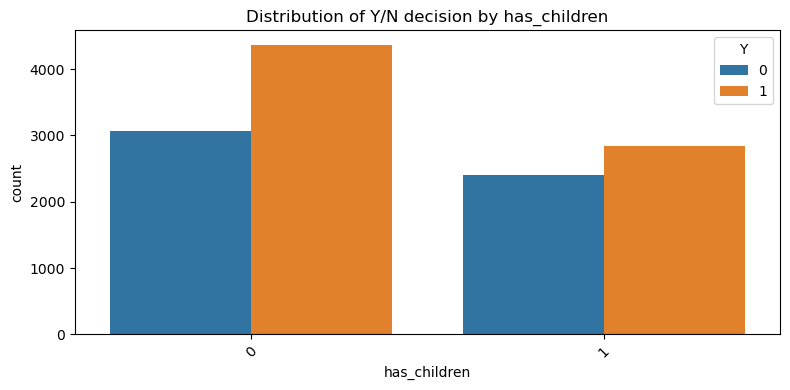

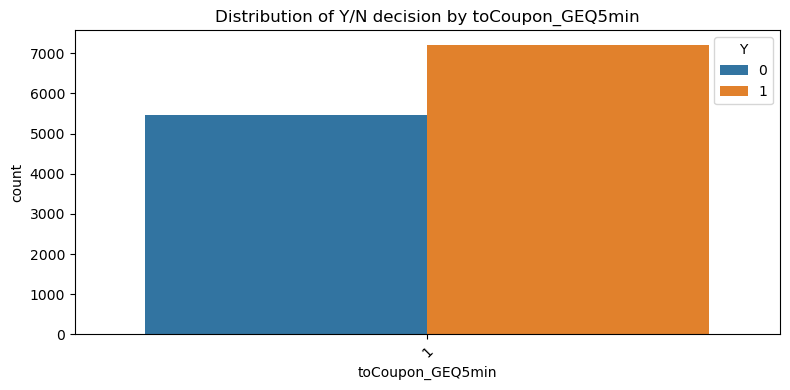

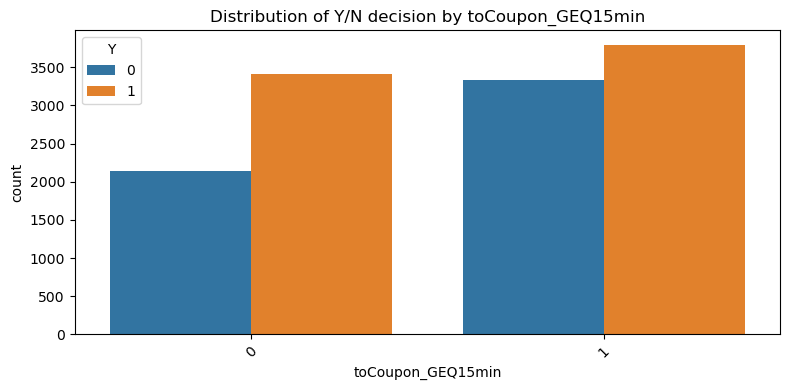

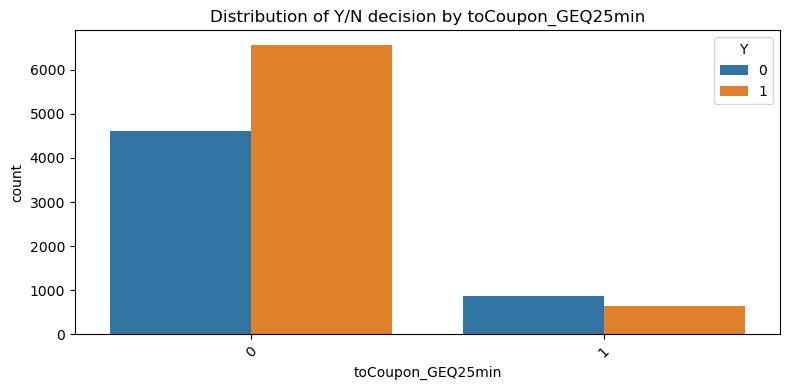

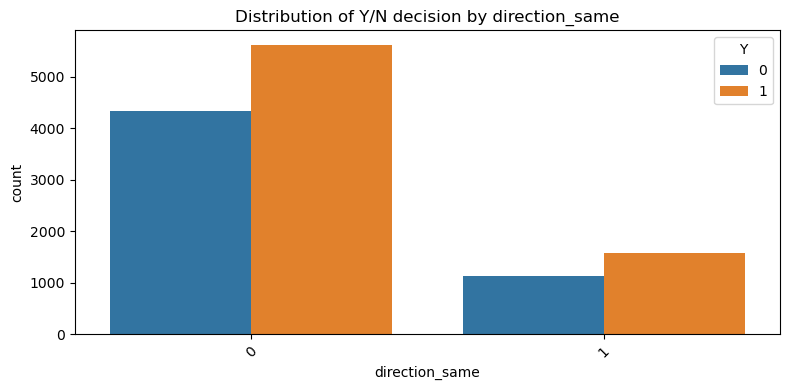

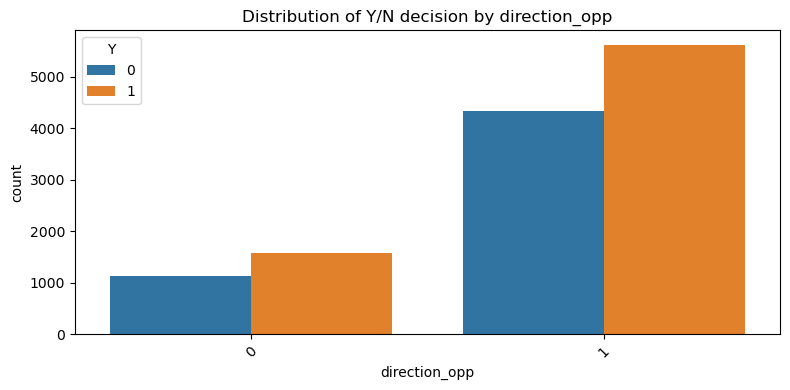

In [15]:
#I'm borrowing this logic from the course material.

categorical_columns = data.select_dtypes(include=['int64']).columns

for col in categorical_columns:
    if col != 'Y':
        plt.figure(figsize=(8, 4))
        sns.countplot(x=col, hue='Y', data=data)
        plt.title(f'Distribution of Y/N decision by {col}')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

2. Investigate the dataset for missing or problematic data.

In [17]:
data.shape

(12684, 26)

In [18]:
data.isnull().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [20]:
data.describe()

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12684.000000,12684.000000,12684.0,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
mean,63.301798,0.414144,1.0,0.561495,0.119126,0.214759,0.785241,0.568433
std,19.154486,0.492593,0.0,0.496224,0.323950,0.410671,0.410671,0.495314
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


In [21]:
# Columns with missing data:
# car                     12576
# Bar                       107
# CoffeeHouse               217
# CarryAway                 151
# RestaurantLessThan20      130
# Restaurant20To50          189

In [22]:
# Getting a better sense of the data in the car column
data[~data['car'].isnull()]['car'].value_counts()

car
Scooter and motorcycle                      22
Mazda5                                      22
do not drive                                22
crossover                                   21
Car that is too old to install Onstar :D    21
Name: count, dtype: int64

In [23]:
data[(data['Bar'].isnull())]

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
517,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,50plus,Divorced,...,NaN,NaN,NaN,NaN,1,0,0,0,1,0
518,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,50plus,Divorced,...,NaN,NaN,NaN,NaN,1,0,0,0,1,0
519,No Urgent Place,Friend(s),Sunny,80,2PM,Restaurant(<20),1d,Male,50plus,Divorced,...,NaN,NaN,NaN,NaN,1,1,0,0,1,1
520,No Urgent Place,Friend(s),Sunny,80,6PM,Coffee House,2h,Male,50plus,Divorced,...,NaN,NaN,NaN,NaN,1,0,0,0,1,0
521,No Urgent Place,Friend(s),Sunny,55,2PM,Coffee House,2h,Male,50plus,Divorced,...,NaN,NaN,NaN,NaN,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12168,Work,Alone,Rainy,55,7AM,Restaurant(<20),2h,Female,31,Single,...,less1,gt8,1~3,less1,1,0,0,1,0,0
12169,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Female,31,Single,...,less1,gt8,1~3,less1,1,0,0,0,1,0
12170,Work,Alone,Snowy,30,7AM,Coffee House,1d,Female,31,Single,...,less1,gt8,1~3,less1,1,0,0,1,0,1
12171,Work,Alone,Snowy,30,7AM,Bar,1d,Female,31,Single,...,less1,gt8,1~3,less1,1,1,1,0,1,0


3. Decide what to do about your missing data -- drop, replace, other...

In [25]:
# Aside from dropping the car column, I decided to clean up data later on when the analysis becomes more specific

In [26]:
data = data.drop('car', axis=1)
data.columns

Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'Bar', 'CoffeeHouse', 'CarryAway',
       'RestaurantLessThan20', 'Restaurant20To50', 'toCoupon_GEQ5min',
       'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same',
       'direction_opp', 'Y'],
      dtype='object')

4. What proportion of the total observations chose to accept the coupon?



In [28]:
data['Y'].value_counts(normalize=True).reset_index().sort_values(by=['Y'], ascending=[False])

,Y,proportion
0,1,0.568433
1,0,0.431567


5. Use a bar plot to visualize the `coupon` column.

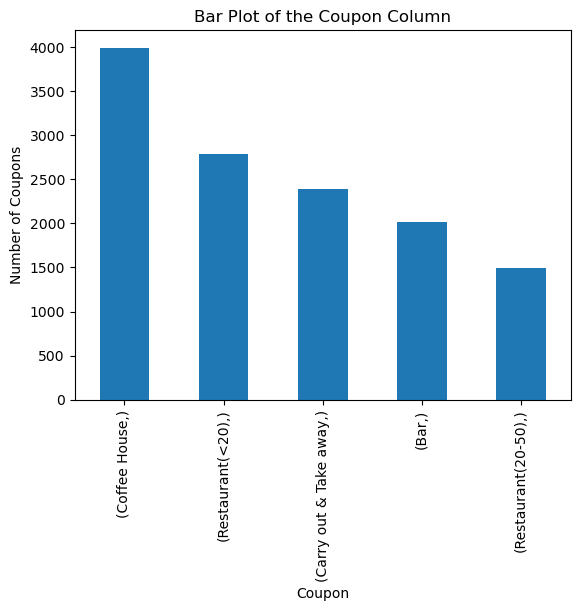

In [30]:
data[['coupon']].value_counts().plot(kind='bar')
plt.title('Bar Plot of the Coupon Column')
plt.xlabel('Coupon')
plt.ylabel('Number of Coupons')
plt.show()

6. Use a histogram to visualize the temperature column.

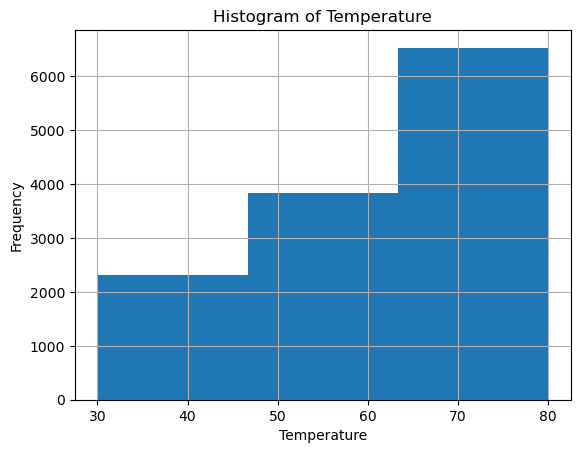

In [32]:
plt.hist(data['temperature'].tolist(), bins=3)
plt.title('Histogram of Temperature')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.grid()
plt.show()

In [33]:
# data[['temperature']].plot(kind='hist')
# plt.show()

In [34]:
# data.plot(kind='hist',y='temperature')
# plt.show()

In [35]:
# px.histogram(data, x='temperature')

In [36]:
# sns.histplot(data=data, x="temperature")
# plt.show()

In [37]:
# sns.displot(data=data, x="temperature", kde=True) #kde plot in seaborn
# plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [39]:
data.columns

Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'Bar', 'CoffeeHouse', 'CarryAway',
       'RestaurantLessThan20', 'Restaurant20To50', 'toCoupon_GEQ5min',
       'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same',
       'direction_opp', 'Y'],
      dtype='object')

In [40]:
# Creating the new DataFrame that contains only the bar coupons
bar_cpn = data[data['coupon']=='Bar']
bar_cpn.shape

(2017, 25)

In [41]:
# Looking for number of bar coupons with null values
bar_cpn[['Bar','Y']].isnull().sum()

Bar    21
Y       0
dtype: int64

In [42]:
# Dropping rows where the Bar coupon type has null values in the Bar column
bar_cpn = bar_cpn.dropna(subset = ['Bar'])
bar_cpn.shape

(1996, 25)

2. What proportion of bar coupons were accepted?
Answer: 41.0%


In [44]:
bar_cpn['Y'].value_counts(normalize=True).reset_index().sort_values(by='Y', ascending=False)

,Y,proportion
1,1,0.410321
0,0,0.589679


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.

Answer: Acceptance rate of those who went to a bar 3 or fewer times a month was 37.1%, while the acceptance rate was 76.9% for those who went to the bar more often.

In [47]:
bar_cpn.groupby([bar_cpn['Bar'].isin(['never','less1','1~3']),bar_cpn['Y']])[['Y']].count().rename(columns={'Y':'freq'}).sort_values(by=['Bar','Y'], ascending=[False,False]).reset_index()

,Bar,Y,freq
0,True,1,666
1,True,0,1131
2,False,1,153
3,False,0,46


In [48]:
bar_cpn.groupby([bar_cpn['Bar'].isin(['never','less1','1~3'])])[['Y']].value_counts(normalize=True).reset_index().sort_values(by=['Bar','Y'], ascending=[False,False])

,Bar,Y,proportion
3,True,1,0.370618
2,True,0,0.629382
0,False,1,0.768844
1,False,0,0.231156


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


Answer: 69.5%

In [51]:
bar_cpn.columns

Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'Bar', 'CoffeeHouse', 'CarryAway',
       'RestaurantLessThan20', 'Restaurant20To50', 'toCoupon_GEQ5min',
       'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same',
       'direction_opp', 'Y'],
      dtype='object')

In [52]:
bar_cpn[['age']].value_counts()

age    
21         416
26         392
31         334
50plus     281
36         206
41         171
46         109
below21     87
Name: count, dtype: int64

In [53]:
# Cleaning up data in the age column
bar_cpn['age'] = bar_cpn['age'].str.replace('50plus', '50')
bar_cpn['age'] = bar_cpn['age'].str.replace('below21', '17')

In [54]:
bar_cpn[['age']].value_counts().reset_index().sort_values(by=['age'], ascending=[True])

,age,count
7,17,87
0,21,416
1,26,392
2,31,334
4,36,206
5,41,171
6,46,109
3,50,281


In [55]:
bar_cpn['age'] = pd.to_numeric(bar_cpn['age'])

In [56]:
bar_cpn[['age']].dtypes

age    int64
dtype: object

In [57]:
bar_cpn[['Bar']].value_counts()

Bar  
never    830
less1    570
1~3      397
4~8      150
gt8       49
Name: count, dtype: int64

In [58]:
bar_cpn[(bar_cpn['Bar'].isin(['1~3','4~8','gt8'])) & (bar_cpn['age']>25)][['Y']].value_counts(normalize=True).reset_index().sort_values(by=['Y'], ascending=[False])

,Y,proportion
0,1,0.695238
1,0,0.304762


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


Answer: 71.3%

In [61]:
bar_cpn[['Bar']].value_counts()

Bar  
never    830
less1    570
1~3      397
4~8      150
gt8       49
Name: count, dtype: int64

In [62]:
bar_cpn[['passanger']].value_counts()

passanger
Alone        1192
Friend(s)     331
Partner       270
Kid(s)        203
Name: count, dtype: int64

In [63]:
bar_cpn[['occupation']].value_counts()

occupation                               
Unemployed                                   298
Student                                      251
Computer & Mathematical                      228
Sales & Related                              178
Education&Training&Library                   137
Management                                   118
Office & Administrative Support              105
Arts Design Entertainment Sports & Media      91
Business & Financial                          88
Retired                                       75
Food Preparation & Serving Related            48
Community & Social Services                   44
Healthcare Support                            44
Healthcare Practitioners & Technical          41
Transportation & Material Moving              35
Legal                                         34
Protective Service                            27
Architecture & Engineering                    27
Personal Care & Service                       27
Life Physical Social Scienc

In [64]:
bar_cpn[(bar_cpn['Bar'].isin(['1~3','4~8','gt8'])) & (~(bar_cpn['passanger']=='Kid(s)')) & (~(bar_cpn['occupation']=='Farming Fishing & Forestry'))][['Y']].value_counts(normalize=True).reset_index().sort_values(by=['Y'], ascending=[False])

,Y,proportion
0,1,0.713249
1,0,0.286751


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.

I'm not 100% sure how to interpret this part. Are we supposed to provide one answer, or 3 answers? To be safe, I’ll provide 4 answers - 1 answer per bullet, and one answer assuming there is an OR operation between each bullet. 

Answers:
- First bullet: 71.3%
- Second bullet: 64.1%
- Third bullet: 41.7%
- Aggregated results: 56.0%

In [68]:
#I borrowed part of this function from the internet
def split_custom(val):
    if '-' in val:
        return val.split('-', 1)
    elif 'or' in val:
        return val.split('or', 1)
    elif 'than' in val:
        return val.split('than', 1)
    else:
        return [val, None]

bar_cpn[['income_lb', 'income_ub']] = bar_cpn['income'].apply(split_custom).apply(pd.Series)
bar_cpn[['income','income_lb','income_ub']].value_counts()
bar_cpn['income_lb'] = bar_cpn['income_lb'].str.replace('$','')
bar_cpn['income_ub'] = bar_cpn['income_ub'].str.replace('$','')
bar_cpn['income_lb'] = bar_cpn['income_lb'].str.replace('Less','0')
bar_cpn['income_ub'] = bar_cpn['income_ub'].str.replace('More','10000000')
bar_cpn['income_lb'] = pd.to_numeric(bar_cpn['income_lb'])
bar_cpn['income_ub'] = pd.to_numeric(bar_cpn['income_ub'])
bar_cpn[['income','income_lb','income_ub']].value_counts().reset_index().sort_values(by=['income_lb'])
# bar_cpn[(bar_cpn['income_lb']<50000)]

,income,income_lb,income_ub,count
5,Less than $12500,0,12500,164
2,$12500 - $24999,12500,24999,288
0,$25000 - $37499,25000,37499,317
3,$37500 - $49999,37500,49999,261
4,$50000 - $62499,50000,62499,257
8,$62500 - $74999,62500,74999,129
6,$75000 - $87499,75000,87499,147
7,$87500 - $99999,87500,99999,142
1,$100000 or More,100000,10000000,291


In [69]:
# -go to bars more than once a month, had passengers that were not a kid, and were not widowed 
bar_cpn[
        (
            (bar_cpn['Bar'].isin(['1~3','4~8','gt8']))
        & (~(bar_cpn['passanger']=='Kid(s)'))
        & (~(bar_cpn['maritalStatus']=='Widowed'))
        )
        ][['Y']].value_counts(normalize=True).reset_index().sort_values(by=['Y'], ascending=[False])

,Y,proportion
0,1,0.713249
1,0,0.286751


In [70]:
# -go to bars more than once a month and are under the age of 30
bar_cpn[
        (
            (bar_cpn['Bar'].isin(['1~3','4~8','gt8']))
        & (~(bar_cpn['age']<30))
        )
        ][['Y']].value_counts(normalize=True).reset_index().sort_values(by=['Y'], ascending=[False])

,Y,proportion
0,1,0.641434
1,0,0.358566


In [71]:
# -go to cheap restaurants more than 4 times a month and income is less than 50K
bar_cpn[
        (
            (bar_cpn['RestaurantLessThan20'].isin(['4~8','gt8']))
        & (~(bar_cpn['income_lb']<50000))
        )
        ][['Y']].value_counts(normalize=True).reset_index().sort_values(by=['Y'], ascending=[False])

,Y,proportion
1,1,0.417073
0,0,0.582927


In [72]:
# Compare the acceptance rates between those drivers who:
# -go to bars more than once a month, had passengers that were not a kid, and were not widowed OR
# -go to bars more than once a month and are under the age of 30 OR
# -go to cheap restaurants more than 4 times a month and income is less than 50K.

bar_cpn[
        (
            (bar_cpn['Bar'].isin(['1~3','4~8','gt8']))
        & (~(bar_cpn['passanger']=='Kid(s)'))
        & (~(bar_cpn['maritalStatus']=='Widowed'))
        )
        |
        (
            (bar_cpn['Bar'].isin(['1~3','4~8','gt8']))
        & (~(bar_cpn['age']<30))
        )
        |
        (
            (bar_cpn['RestaurantLessThan20'].isin(['4~8','gt8']))
        & (~(bar_cpn['income_lb']<50000))
        )
        ][['Y']].value_counts(normalize=True).reset_index().sort_values(by=['Y'], ascending=[False])

,Y,proportion
0,1,0.559524
1,0,0.440476


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

Answer: Those who tend to accept the bar coupon are individuals who:
- have a pre-existing routine of going to bars
- do not have kids
- make a decent living

As long as people have a habit of going to a bar, age does not seem to be factor.

In [75]:
bar_cpn[(bar_cpn['Bar'].isin(['1~3','4~8','gt8'])) & (~(bar_cpn['age']<30))
       ].groupby('age')[['Y']].value_counts(normalize=True).reset_index().sort_values(by=['age','Y'], ascending=[True,False])

,age,Y,proportion
0,31,1,0.656250
1,31,0,0.343750
3,36,1,0.500000
2,36,0,0.500000
4,41,1,0.656250
5,41,0,0.343750
6,46,1,0.750000
7,46,0,0.250000
8,50,1,0.671642
9,50,0,0.328358


### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

For this exercise, I will explore the characteristics of passengers who accept **Coffee House** coupons becuase at the top level (based on a plot further above), the split seems to be 50%/50%.

First, I'll filter the universe to just Coffee House coupons and explore its data.


In [79]:
data.columns

Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'Bar', 'CoffeeHouse', 'CarryAway',
       'RestaurantLessThan20', 'Restaurant20To50', 'toCoupon_GEQ5min',
       'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same',
       'direction_opp', 'Y'],
      dtype='object')

In [80]:
# Creating the new DataFrame that contains only the bar coupons
ch_cpn = data[data['coupon']=='Coffee House']
ch_cpn.shape

(3996, 25)

In [81]:
# Looking for number of bar coupons with null values
ch_cpn[['CoffeeHouse','Y']].isnull().sum()

CoffeeHouse    72
Y               0
dtype: int64

In [82]:
# Dropping rows where the Coffee House coupon type has null values in the CoffeeHouse column
ch_cpn = ch_cpn.dropna(subset = ['CoffeeHouse'])
ch_cpn.shape

(3924, 25)

Next, I will create series of bar plots to get a high level sense of the acceptance rate in various categories

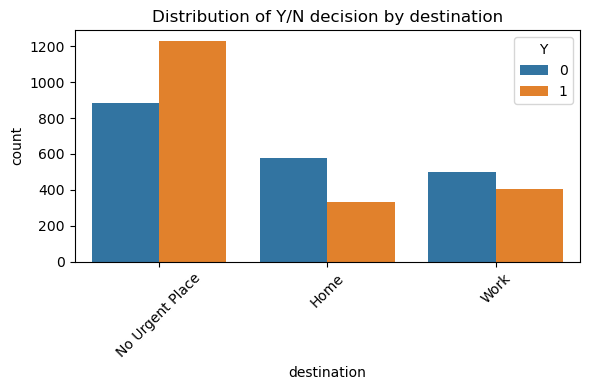

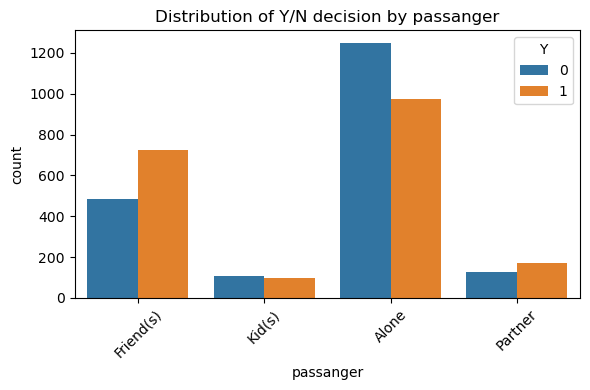

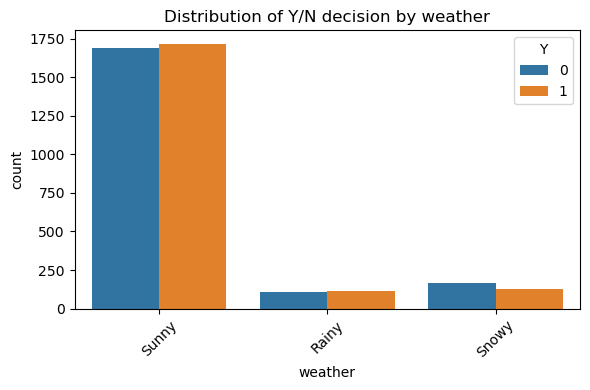

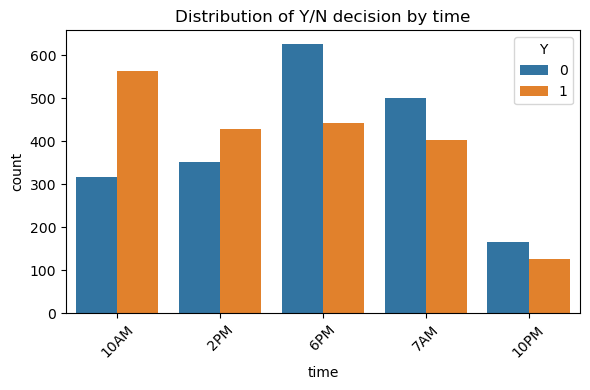

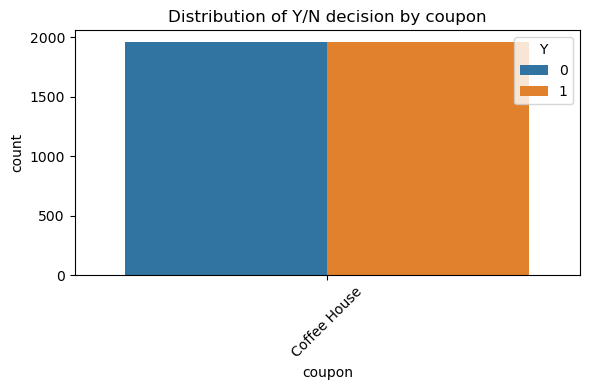

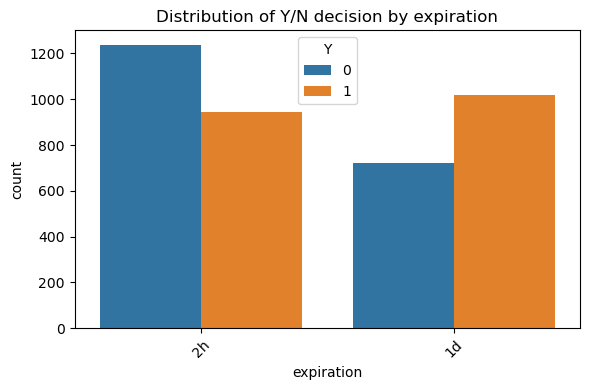

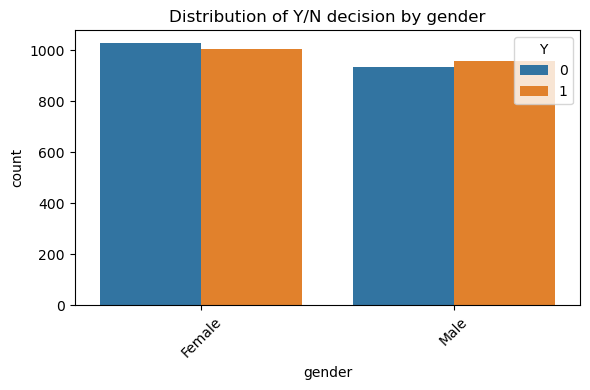

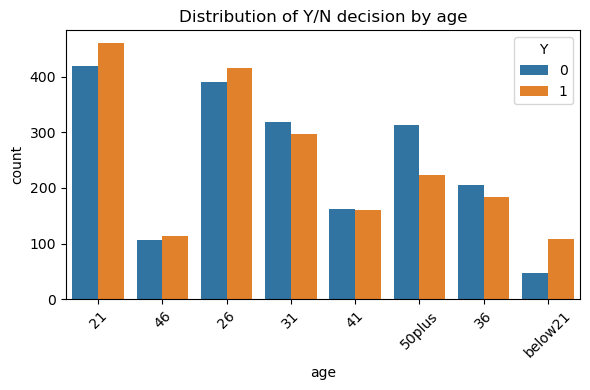

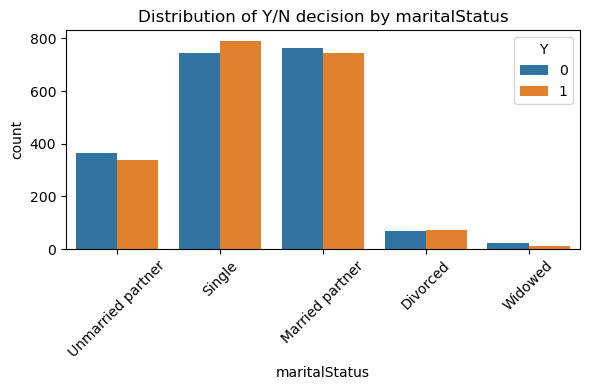

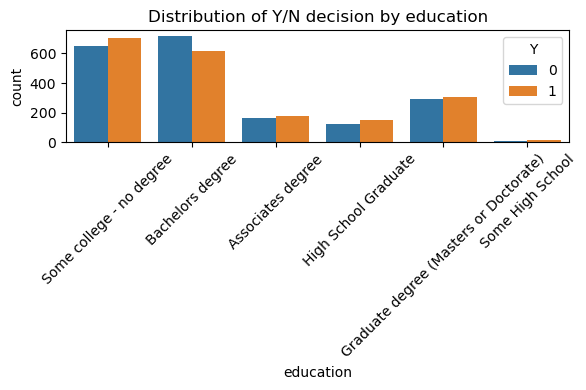

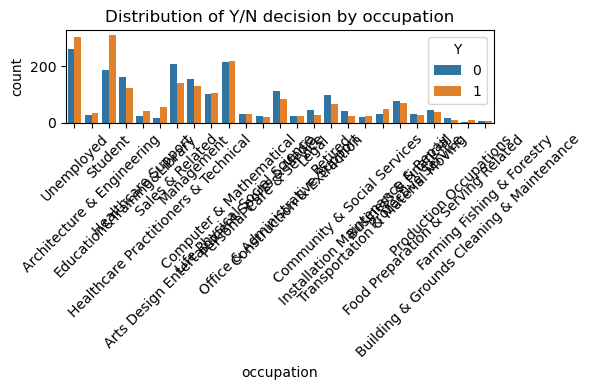

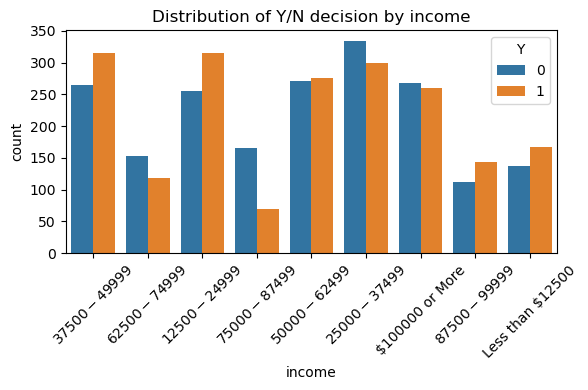

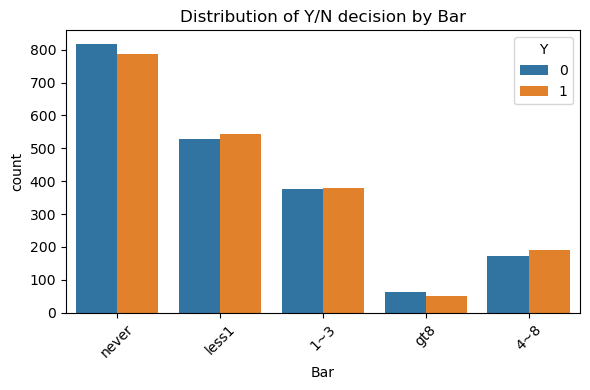

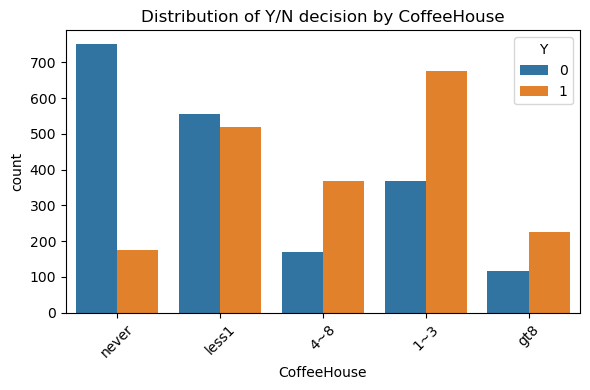

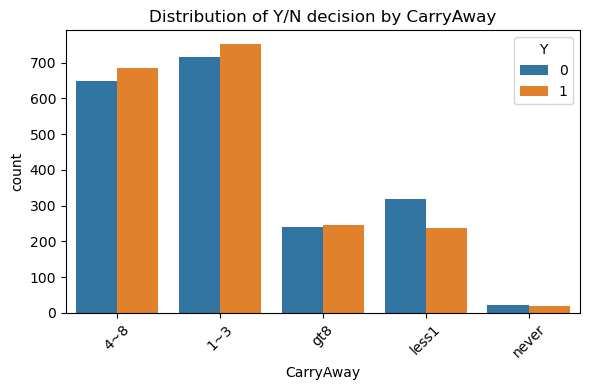

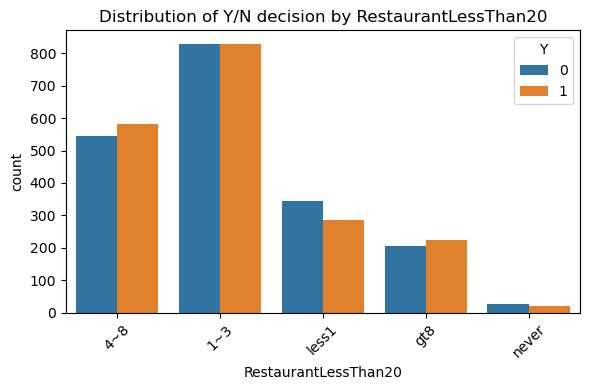

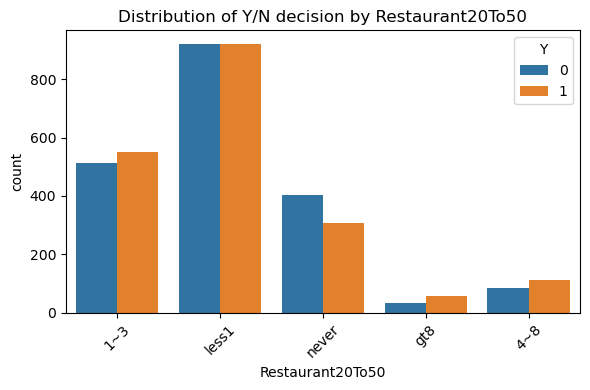

In [84]:
#I'm borrowing this logic from the course material.

categorical_columns = ch_cpn.select_dtypes(include=['object']).columns

for col in categorical_columns:
    if col != 'Y':
        plt.figure(figsize=(6, 4))
        sns.countplot(x=col, hue='Y', data=ch_cpn)
        plt.title(f'Distribution of Y/N decision by {col}')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

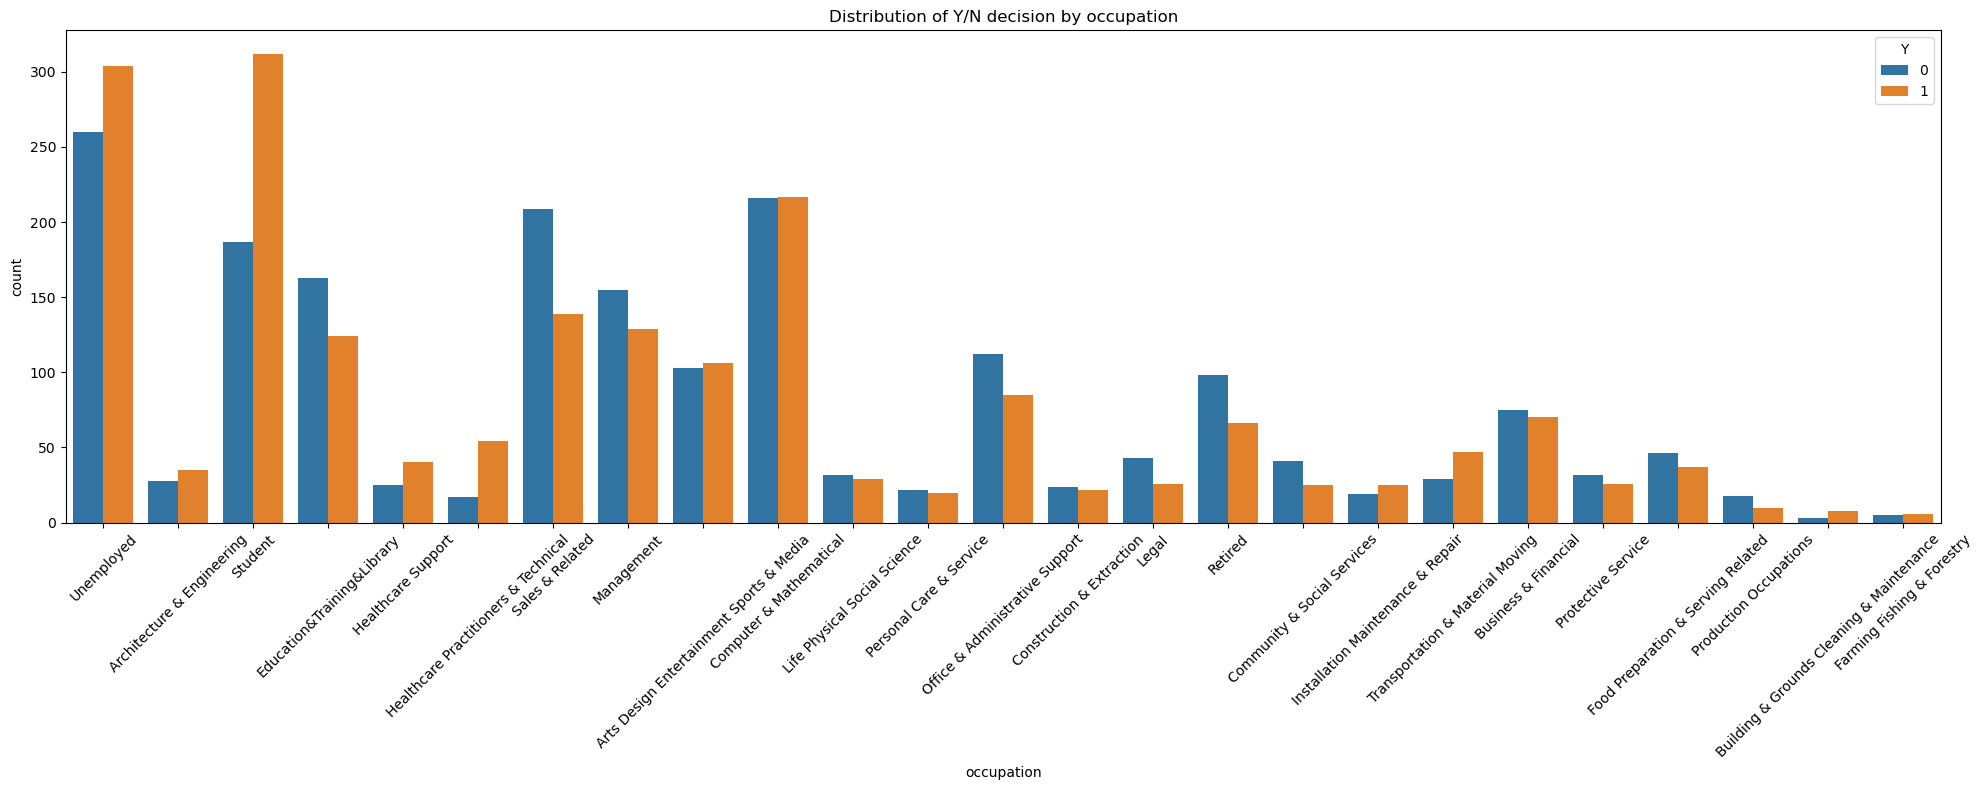

In [85]:
plt.figure(figsize=(20, 8))
sns.countplot(x='occupation', hue='Y', data=ch_cpn)
plt.title(f'Distribution of Y/N decision by {'occupation'}')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

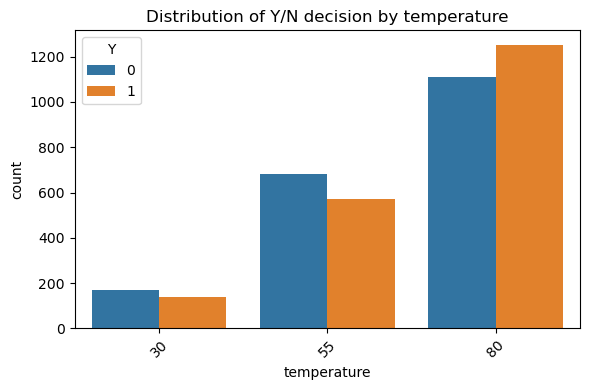

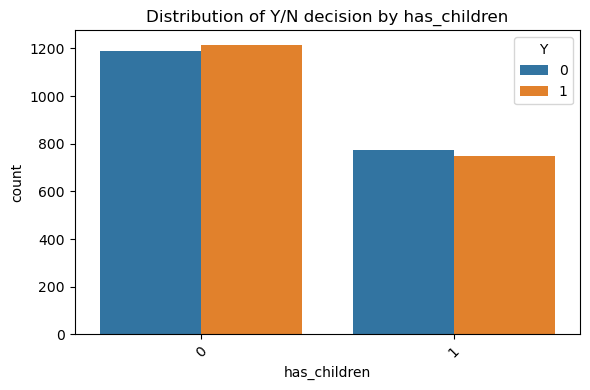

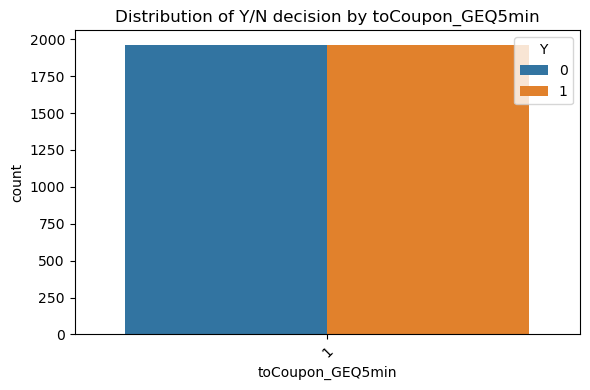

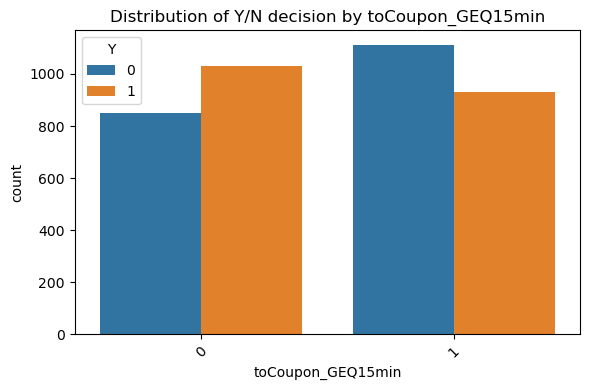

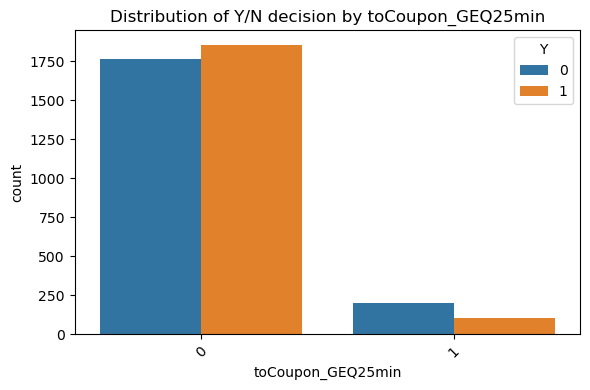

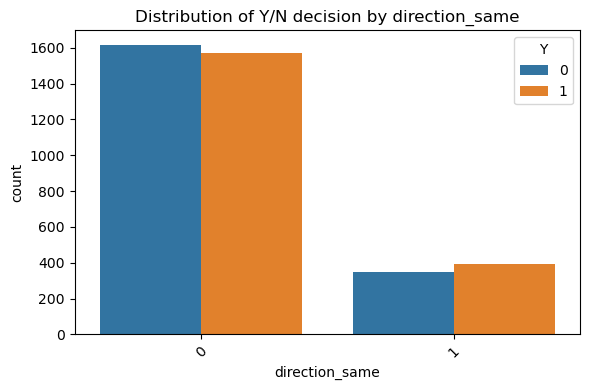

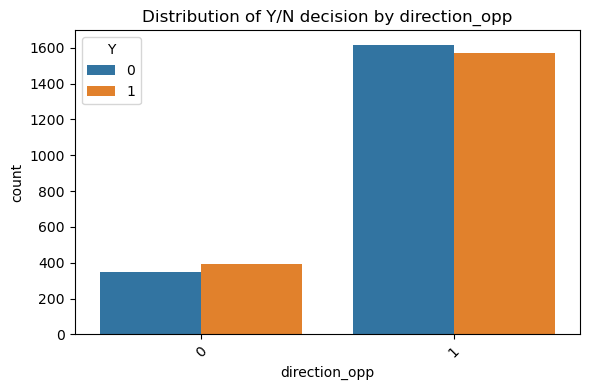

In [86]:
#I'm borrowing this logic from the course material.

categorical_columns = ch_cpn.select_dtypes(include=['int64']).columns  # Adjust as necessary

for col in categorical_columns:
    if col != 'Y':  # Assuming 'credit_class' is also a categorical column
        plt.figure(figsize=(6, 4))
        sns.countplot(x=col, hue='Y', data=ch_cpn)
        plt.title(f'Distribution of Y/N decision by {col}')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

The bar plots suggest that:
- Characteristics that don't seem to affect acceptance rate include: gender, marital status, has children, and education level
- Acceptance rate seems more likely to be higher for drivers who are unemployed or students, under the age of 31, driving with friend(s), make less than $50k
- Acceptance rate also seems to be higher late morning/early afternoon, when the coupon expires in 1 day, and when drivers already have a habit of going to coffee houses

Let's assess actual acceptance rates for some of these characteristics (results are summarized below)

In [89]:
# Cleaning up data in the age column
ch_cpn['age'] = ch_cpn['age'].str.replace('50plus', '50')
ch_cpn['age'] = ch_cpn['age'].str.replace('below21', '17')
ch_cpn['age'] = pd.to_numeric(ch_cpn['age'])

In [90]:
# Cleaning up data in the income column
ch_cpn[['income_lb', 'income_ub']] = ch_cpn['income'].apply(split_custom).apply(pd.Series)
ch_cpn[['income','income_lb','income_ub']].value_counts()
ch_cpn['income_lb'] = ch_cpn['income_lb'].str.replace('$','')
ch_cpn['income_ub'] = ch_cpn['income_ub'].str.replace('$','')
ch_cpn['income_lb'] = ch_cpn['income_lb'].str.replace('Less','0')
ch_cpn['income_ub'] = ch_cpn['income_ub'].str.replace('More','10000000')
ch_cpn['income_lb'] = pd.to_numeric(ch_cpn['income_lb'])
ch_cpn['income_ub'] = pd.to_numeric(ch_cpn['income_ub'])
ch_cpn[['income','income_lb','income_ub']].value_counts().reset_index().sort_values(by=['income_lb'])
# ch_cpn[(ch_cpn['income_lb']<50000)]

,income,income_lb,income_ub,count
5,Less than $12500,0,12500,304
2,$12500 - $24999,12500,24999,571
0,$25000 - $37499,25000,37499,633
1,$37500 - $49999,37500,49999,580
3,$50000 - $62499,50000,62499,546
6,$62500 - $74999,62500,74999,271
8,$75000 - $87499,75000,87499,236
7,$87500 - $99999,87500,99999,255
4,$100000 or More,100000,10000000,528


In [91]:
categorical_columns

Index(['temperature', 'has_children', 'toCoupon_GEQ5min', 'toCoupon_GEQ15min',
       'toCoupon_GEQ25min', 'direction_same', 'direction_opp', 'Y'],
      dtype='object')

In [92]:
ch_cpn[(ch_cpn['destination'].isin(['No Urgent Place']))][['Y']].value_counts(
       normalize=True).reset_index().sort_values(by=['Y'], ascending=[False])

,Y,proportion
0,1,0.581715
1,0,0.418285


In [93]:
ch_cpn[(ch_cpn['passanger'].isin(['Friend(s)']))][['Y']].value_counts(
       normalize=True).reset_index().sort_values(by=['Y'], ascending=[False])

,Y,proportion
0,1,0.59917
1,0,0.40083


In [94]:
ch_cpn[(ch_cpn['expiration'].isin(['1d']))][['Y']].value_counts(
       normalize=True).reset_index().sort_values(by=['Y'], ascending=[False])

,Y,proportion
0,1,0.584721
1,0,0.415279


In [95]:
ch_cpn[(ch_cpn['time'].isin(['10AM','2PM']))][['Y']].value_counts(
       normalize=True).reset_index().sort_values(by=['Y'], ascending=[False])

,Y,proportion
0,1,0.597231
1,0,0.402769


In [96]:
ch_cpn[(ch_cpn['age']<31)][['Y']].value_counts(
       normalize=True).reset_index().sort_values(by=['Y'], ascending=[False])

,Y,proportion
0,1,0.534783
1,0,0.465217


In [97]:
ch_cpn[(ch_cpn['income_lb']<50000)][['Y']].value_counts(
       normalize=True).reset_index().sort_values(by=['Y'], ascending=[False])

,Y,proportion
0,1,0.524904
1,0,0.475096


In [98]:
ch_cpn[(ch_cpn['CoffeeHouse'].isin(['1~3','4~8','gt8']))][['Y']].value_counts(
       normalize=True).reset_index().sort_values(by=['Y'], ascending=[False])

,Y,proportion
0,1,0.66025
1,0,0.33975


In [99]:
ch_cpn[(ch_cpn['occupation'].isin(['Unemployed','Student']))][['Y']].value_counts(
       normalize=True).reset_index().sort_values(by=['Y'], ascending=[False])

,Y,proportion
0,1,0.579492
1,0,0.420508


In [100]:
# Combining some of the characteristics together
ch_cpn[((ch_cpn['CoffeeHouse'].isin(['1~3','4~8','gt8']))     #66.0%
      & (ch_cpn['destination'].isin(['No Urgent Place']))     #73.9%
      & (ch_cpn['passanger'].isin(['Friend(s)']))             #76.3%
      & (ch_cpn['time'].isin(['10AM','2PM']))                 #78.6%
      & (ch_cpn['expiration'].isin(['1d']))                   #83.1%
      & (ch_cpn['occupation'].isin(['Unemployed','Student'])) #92.7#
       )][['Y']].value_counts(normalize=True).reset_index().sort_values(by=['Y'], ascending=[False])

,Y,proportion
0,1,0.927273
1,0,0.072727


CONCLUSION: When combining six of the characteristics together of drivers receiving coupons to a **Coffee House**, it's quite intriguing to see how high the acceptance rate becomes. Let’s make drivers who already have a habit of going to coffee houses be the baseline, then layer on top of that additional characteristics to see how the acceptance rate evolves: 
- Passengers who go to coffee houses at least once a month have an acceptance rate of: 66.0%
- Additionally, if they are in no rush to get to a final destination, the acceptance rate grows to: 73.9%
- If they are also driving with at least one friend, the acceptance rate grows to: 76.3%
- Furthermore, if it’s late morning or early afternoon, the acceptance rate grows to: 78.6%
- If the expiration date is one day, the acceptance rate grows to: 83.1%
- Finally, if the driver is either unemployed or a student, the acceptance rate grows further to: 92.7%